In [2]:
#Author:Fairuz Shadmani Shishir
#Date:22.07.2019

## Time Series Forecasting Using Popular SARIMAX (Seasonal AutoRegressive Integrated Moving Averages with eXogenous regressors) 

In [3]:

#import necessary libraries

import warnings
import itertools
import numpy as np
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')
import pandas as pd
import statsmodels.api as sm
import matplotlib
matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'k'

In [4]:
#import Dataset
df = pd.read_csv("Sales Data.csv")

# Data preprocessing

In [5]:
df.head()

,InvoiceDate,ProductCode,Sales
0,7/29/2017,IJ46,3582.55
1,5/3/2018,PW19,18153.91
2,6/8/2017,SY44,7318.75
3,6/27/2011,LI05,78.00
4,8/24/2012,SY08,8562.96


In [6]:
#range of the time
df['InvoiceDate'].min(), df['InvoiceDate'].max()


('1/1/2011', '9/9/2018')

In [7]:
df['InvoiceDate']=df['InvoiceDate'].apply(lambda x:x.replace('-','/'))

In [8]:
df['InvoiceDate']= pd.to_datetime(df['InvoiceDate'], format='%Y%m%d', errors='ignore')

In [9]:
df.head()

,InvoiceDate,ProductCode,Sales
0,7/29/2017,IJ46,3582.55
1,5/3/2018,PW19,18153.91
2,6/8/2017,SY44,7318.75
3,6/27/2011,LI05,78.00
4,8/24/2012,SY08,8562.96


In [10]:
df.dtypes

InvoiceDate     object
ProductCode     object
Sales          float64
dtype: object

In [11]:
df['InvoiceDate']=pd.to_datetime(df['InvoiceDate'])

In [12]:
df.head()

,InvoiceDate,ProductCode,Sales
0,2017-07-29,IJ46,3582.55
1,2018-05-03,PW19,18153.91
2,2017-06-08,SY44,7318.75
3,2011-06-27,LI05,78.00
4,2012-08-24,SY08,8562.96


In [13]:
df['InvoiceDate'].min(), df['InvoiceDate'].max()

(Timestamp('2009-01-02 00:00:00'), Timestamp('2019-07-16 00:00:00'))

In [14]:
df.sort_values(by='InvoiceDate',inplace=True)

In [15]:
df.head(20)

,InvoiceDate,ProductCode,Sales
593367,2009-01-02,SY10,64.00
625316,2009-01-02,CA29,906.00
706201,2009-01-02,CA35,296.00
411041,2009-01-02,TABQ,408.00
704820,2009-01-02,LI05,106.00
160536,2009-01-02,TB01,226.00
217898,2009-01-02,LI03,79.00
26390,2009-01-02,TA13,107.00
454559,2009-01-02,LI18,140.00
450353,2009-01-02,CA57,679.00


In [16]:
df=df.groupby('InvoiceDate')['Sales'].sum().reset_index()[['InvoiceDate','Sales']]

In [17]:
df.head(100)

,InvoiceDate,Sales
0,2009-01-02,3011.00
1,2009-01-04,21398.14
2,2009-01-05,22863.92
3,2009-01-06,38069.71
4,2009-01-07,113.00
5,2009-01-08,22946.00
6,2009-01-09,5291.00
7,2009-01-10,572.00
8,2009-01-11,5947.00
9,2009-01-12,4363.00


<Figure size 1440x1440 with 0 Axes>

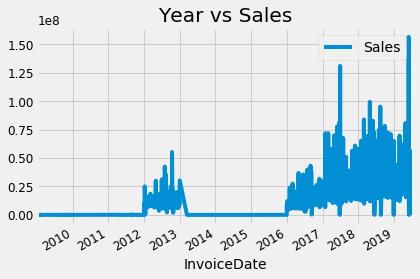

In [18]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,20))
df.plot(x='InvoiceDate',y='Sales')
plt.title('Year vs Sales')
plt.show()


In [19]:
df=df.query("InvoiceDate>='2017-01-01'")

<Figure size 1440x1440 with 0 Axes>

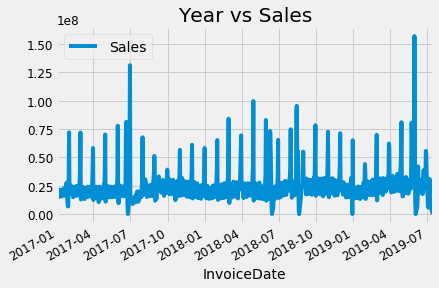

In [20]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,20))
df.plot(x='InvoiceDate',y='Sales')
plt.title('Year vs Sales')
plt.show()

In [21]:
df.head()

,InvoiceDate,Sales
1640,2017-01-01,19284690.61
1641,2017-01-02,20460670.94
1642,2017-01-03,20526807.31
1643,2017-01-04,20244248.82
1644,2017-01-05,18455699.37


# Visualising Time Series Data

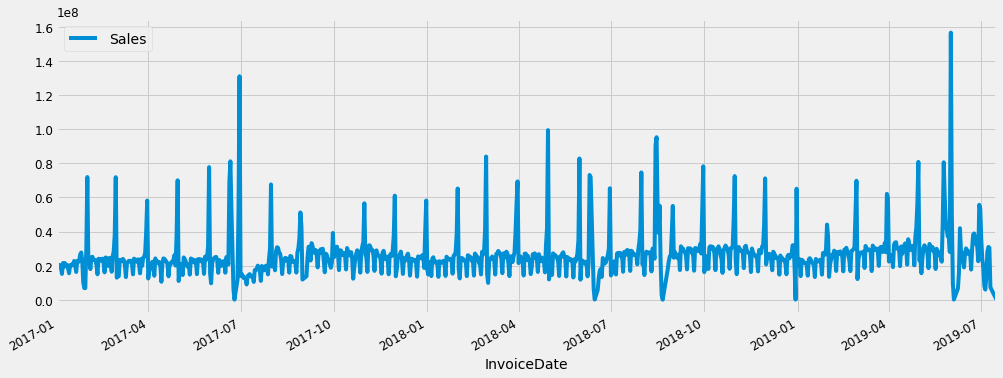

In [22]:
#
df.plot(figsize=(15, 6),x='InvoiceDate')
plt.title("")
plt.show()

## We can also visualize our data using a method called time-series decomposition that allows us to decompose our time series into three distinct components: trend, seasonality, and noise.

In [23]:
df.head()

,InvoiceDate,Sales
1640,2017-01-01,19284690.61
1641,2017-01-02,20460670.94
1642,2017-01-03,20526807.31
1643,2017-01-04,20244248.82
1644,2017-01-05,18455699.37


In [24]:
df.set_index('InvoiceDate',inplace=True)

In [25]:
y = df['Sales'].resample('MS').mean()

In [26]:
y

InvoiceDate
2017-01-01    2.135190e+07
2017-02-01    2.473453e+07
2017-03-01    2.287178e+07
2017-04-01    2.275534e+07
2017-05-01    2.318176e+07
2017-06-01    2.985860e+07
2017-07-01    1.784353e+07
2017-08-01    2.495606e+07
2017-09-01    2.599067e+07
2017-10-01    2.674342e+07
2017-11-01    2.708832e+07
2017-12-01    2.439380e+07
2018-01-01    2.357598e+07
2018-02-01    2.543443e+07
2018-03-01    2.644486e+07
2018-04-01    2.635700e+07
2018-05-01    2.481816e+07
2018-06-01    2.549624e+07
2018-07-01    2.681191e+07
2018-08-01    3.135303e+07
2018-09-01    2.971360e+07
2018-10-01    2.883285e+07
2018-11-01    2.863641e+07
2018-12-01    2.467542e+07
2019-01-01    2.310037e+07
2019-02-01    2.792308e+07
2019-03-01    2.967011e+07
2019-04-01    3.183185e+07
2019-05-01    3.187266e+07
2019-06-01    3.346830e+07
2019-07-01    1.843020e+07
Freq: MS, Name: Sales, dtype: float64

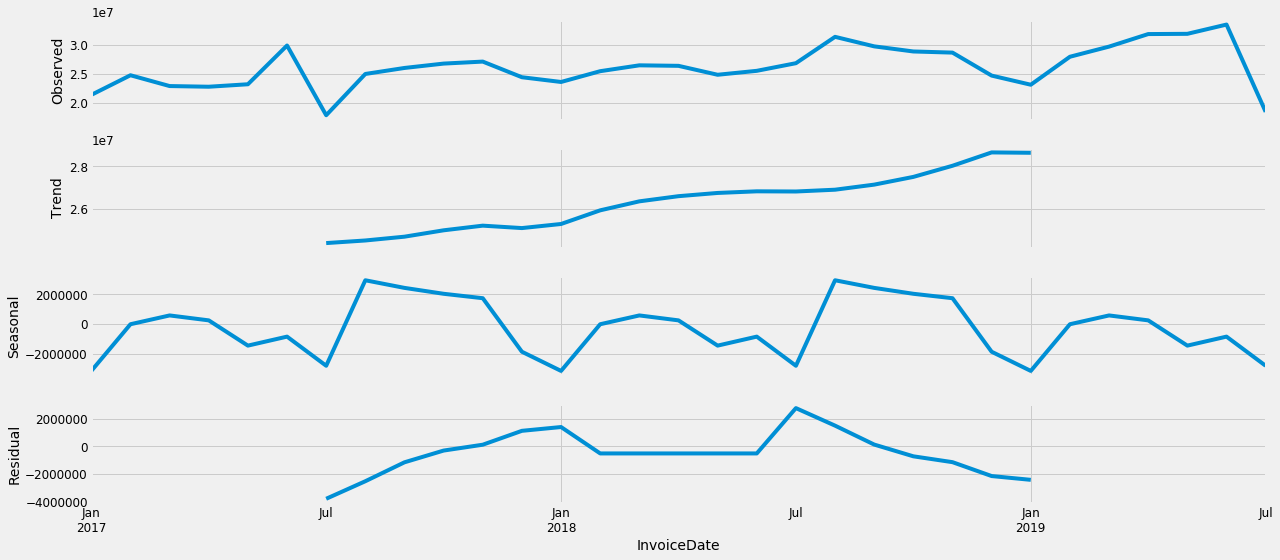

In [27]:
from pylab import rcParams
rcParams['figure.figsize'] = 18, 8
decomposition = sm.tsa.seasonal_decompose(y, model='additive')
fig = decomposition.plot()
plt.show()

# ARIMA models are denoted with the notation ARIMA(p, d, q). These three parameters account for seasonality, trend, and noise in data: 

In [28]:
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]
print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


# This step is parameter Selection for our  ARIMA Time Series Model. Our goal here is to use a “grid search” to find the optimal set of parameters that yields the best performance for our model.

In [29]:
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(y,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            results = mod.fit()
            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:1112.7904185185814
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:610.2184476426
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:636.797363710942
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:240.65116960536386
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:1058.2197499082104
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:574.710022506348
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:690.244066841608
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:240.15654954224578
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:971.6894816094817
ARIMA(0, 1, 0)x(0, 1, 0, 12)12 - AIC:582.1678082239669
ARIMA(0, 1, 0)x(1, 0, 0, 12)12 - AIC:603.5857924970203
ARIMA(0, 1, 0)x(1, 1, 0, 12)12 - AIC:200.15004564728292
ARIMA(0, 1, 1)x(0, 0, 0, 12)12 - AIC:932.148822634105
ARIMA(0, 1, 1)x(0, 1, 0, 12)12 - AIC:544.2350610322756
ARIMA(0, 1, 1)x(1, 0, 0, 12)12 - AIC:601.3256603132841
ARIMA(0, 1, 1)x(1, 1, 0, 12)12 - AIC:205.0337372182633
ARIMA(1, 0, 0)x(0, 0, 0, 12)12 - AIC:1006.3847147709962
ARIMA(1, 0, 0)x(0, 1, 0, 12)12 - AIC:607.2754833638943
ARIMA(1, 0,

## The Akaike Information Critera (AIC) is a widely used measure of a statistical model. It basically quantifies 1) the goodness of fit, and 2) the simplicity/parsimony, of the model into a single statistic.When comparing two models, the one with the lower AIC is generally “better”.

## The above output suggests that SARIMAX(1, 1, 0)x(1, 1, 0, 12) yields the lowest AIC value of 106.84. Therefore we should consider this to be optimal option

In [30]:
mod = sm.tsa.statespace.SARIMAX(y,
                                order=(1, 1, 0),
                                seasonal_order=(1, 1, 0, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results = mod.fit()
print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.0305      4.335      0.238      0.812      -7.466       9.527
ar.S.L12      -0.8113      1.116     -0.727      0.467      -2.999       1.376
sigma2      2.888e+13   9.98e-15   2.89e+27      0.000    2.89e+13    2.89e+13


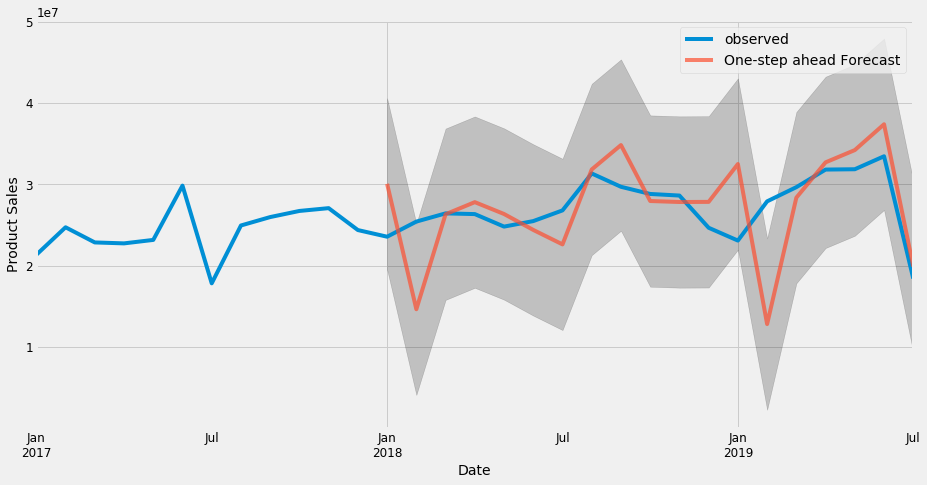

In [32]:
pred = results.get_prediction(start=pd.to_datetime('2018-01-01'), dynamic=False)
pred_ci = pred.conf_int()
ax = y['2016':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 7))
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Date')
ax.set_ylabel('Product Sales')
plt.legend()
plt.show()

In [33]:
y_forecasted = pred.predicted_mean
y_truth = y['2018-01-01':]
mse = ((y_forecasted - y_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

The Mean Squared Error of our forecasts is 29569959092753.88


In [39]:
y_forecasted

InvoiceDate
2018-01-01    3.007730e+07
2018-02-01    1.465357e+07
2018-03-01    2.634042e+07
2018-04-01    2.782626e+07
2018-05-01    2.636954e+07
2018-06-01    2.440925e+07
2018-07-01    2.263002e+07
2018-08-01    3.184551e+07
2018-09-01    3.484490e+07
2018-10-01    2.796510e+07
2018-11-01    2.784399e+07
2018-12-01    2.785856e+07
2019-01-01    3.251228e+07
2019-02-01    1.283058e+07
2019-03-01    2.838268e+07
2019-04-01    3.272022e+07
2019-05-01    3.422953e+07
2019-06-01    3.740245e+07
2019-07-01    1.989858e+07
Freq: MS, dtype: float64

In [34]:
print('The Root Mean Squared Error of our forecasts is {}'.format(round(np.sqrt(mse), 2)))

The Root Mean Squared Error of our forecasts is 5437826.69


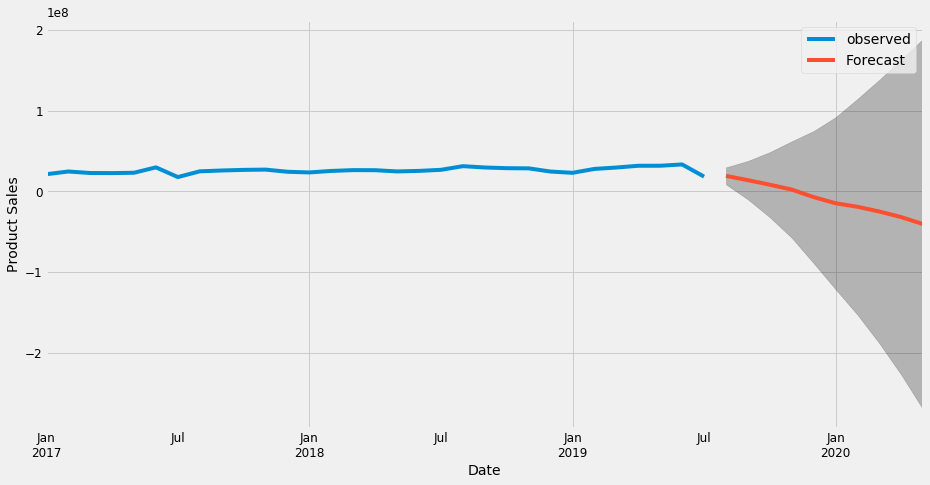

In [35]:
pred_uc = results.get_forecast(steps=10)
pred_ci = pred_uc.conf_int()
ax = y.plot(label='observed', figsize=(14, 7))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('Product Sales')
plt.legend()
plt.show()